# Cinematic Visualizations

Creating 5 stunning visualizations using different cinematic styles from the Cinestyle library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import sys

# Add parent directory to path for cinestyle import
sys.path.insert(0, os.path.abspath('..'))

from cinestyle import FilmNoir, Ghibli, WesAnderson, BladeRunner, StarWars

# Load data
df = pd.read_csv('../data/IMDB Dataset.csv')
with open('findings.json', 'r') as f:
    findings = json.load(f)

# Add computed columns
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

# Create images directory if it doesn't exist
os.makedirs('../images', exist_ok=True)

print('Data loaded successfully!')
print(f'Dataset shape: {df.shape}')
print(f'Findings loaded: {len(findings["visualizations"])} visualizations planned')

Data loaded successfully!
Dataset shape: (50000, 4)
Findings loaded: 5 visualizations planned


## Visualization 1: Film Noir - Sentiment Distribution

High contrast black and white visualization showing the battle between positive and negative reviews.

Creating Visualization 1: Film Noir - Sentiment Distribution...


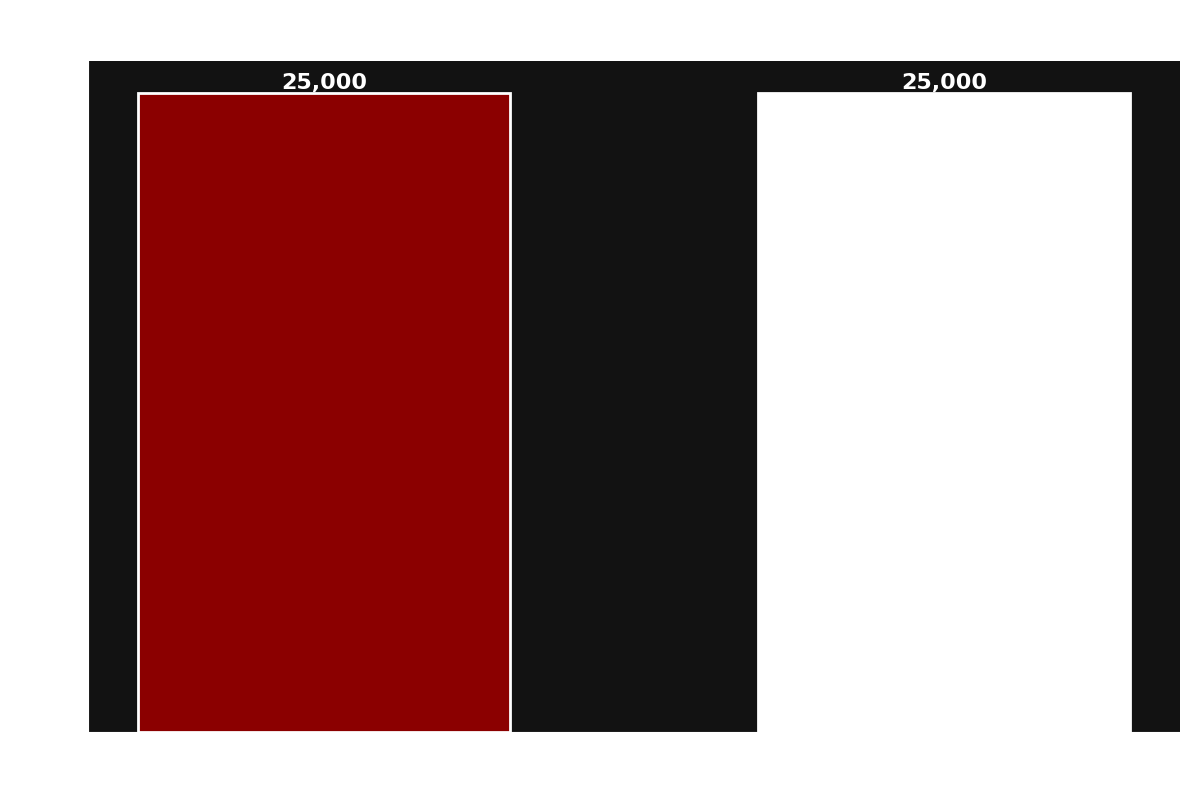

✅ Saved: ../images/01_noir_sentiment.png (106.0 KB)


In [2]:
print('Creating Visualization 1: Film Noir - Sentiment Distribution...')

noir = FilmNoir()
fig, ax = plt.subplots(figsize=(12, 8))
noir.style_axes(ax)

# Bar chart of sentiment counts
sentiments = findings['sentiment_counts']
categories = list(sentiments.keys())
values = list(sentiments.values())

bars = ax.bar(categories, values, color=['#8B0000', '#FFFFFF'], 
              edgecolor='white', linewidth=2, width=0.6)

ax.set_title("LIGHT VS DARK: SENTIMENT DISTRIBUTION", 
             color='white', fontsize=22, fontweight='bold', pad=20)
ax.set_ylabel('Review Count', color='white', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment', color='white', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', color='white', 
            fontsize=16, fontweight='bold')

plt.tight_layout()
output_path = '../images/01_noir_sentiment.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='#121212')
plt.show()

# Verify file exists
if os.path.exists(output_path):
    size_kb = os.path.getsize(output_path) / 1024
    print(f'✅ Saved: {output_path} ({size_kb:.1f} KB)')
else:
    print(f'❌ ERROR: Failed to save {output_path}')

## Visualization 2: Studio Ghibli - Review Length Distribution

Soft, dreamy visualization showing the flow of review lengths like a gentle landscape.

Creating Visualization 2: Studio Ghibli - Review Length Distribution...


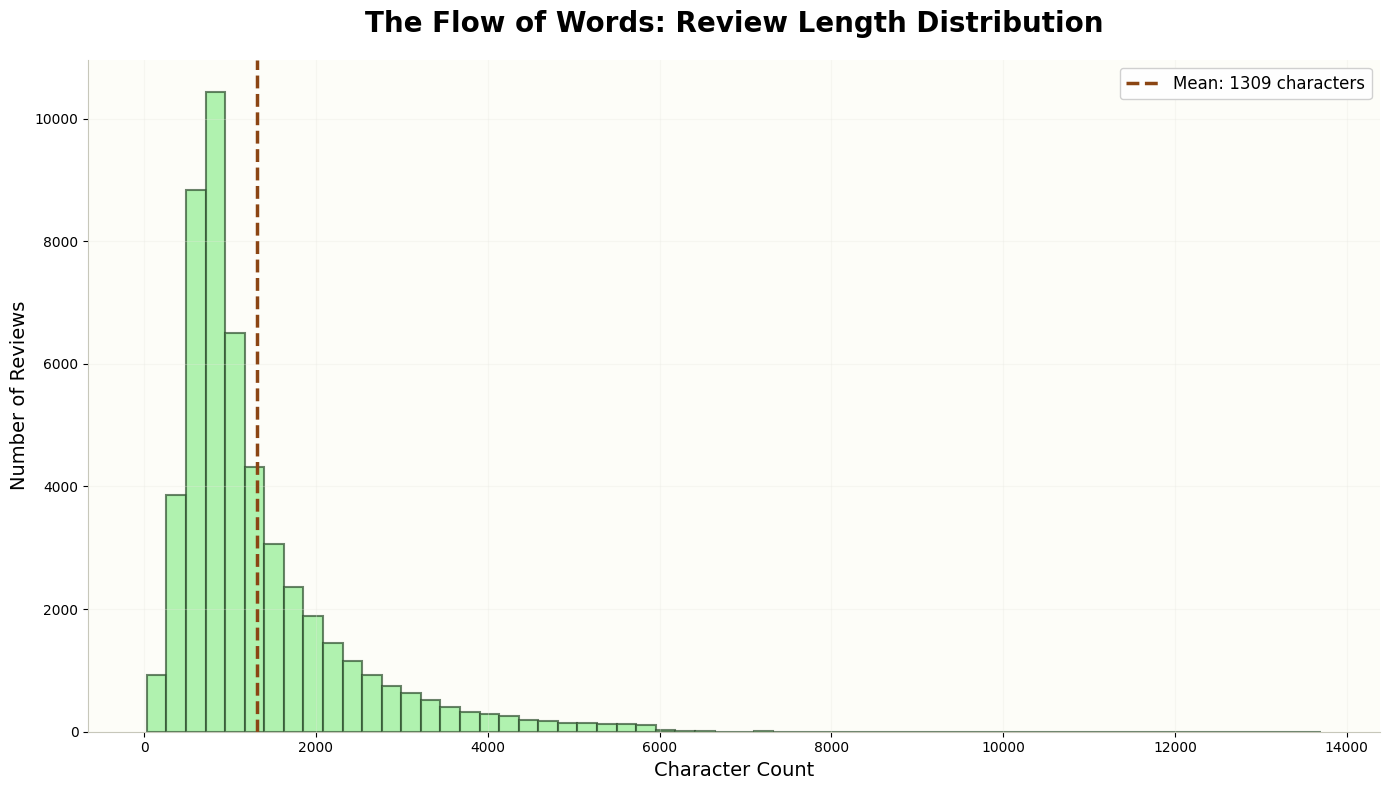

✅ Saved: ../images/02_ghibli_length.png (143.1 KB)


In [3]:
print('Creating Visualization 2: Studio Ghibli - Review Length Distribution...')

ghibli = Ghibli()
fig, ax = plt.subplots(figsize=(14, 8))
ghibli.style_axes(ax)

# Histogram of review lengths
ax.hist(df['review_length'], bins=60, color='#90EE90', 
        alpha=0.7, edgecolor='#2F4F2F', linewidth=1.5)

ax.set_title("The Flow of Words: Review Length Distribution", 
             fontsize=20, pad=20, fontweight='600')
ax.set_xlabel('Character Count', fontsize=14, fontweight='500')
ax.set_ylabel('Number of Reviews', fontsize=14, fontweight='500')

# Add mean line
mean_length = df['review_length'].mean()
ax.axvline(mean_length, color='#8B4513', linestyle='--', 
           linewidth=2.5, label=f'Mean: {mean_length:.0f} characters')
ax.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
output_path = '../images/02_ghibli_length.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

# Verify file exists
if os.path.exists(output_path):
    size_kb = os.path.getsize(output_path) / 1024
    print(f'✅ Saved: {output_path} ({size_kb:.1f} KB)')
else:
    print(f'❌ ERROR: Failed to save {output_path}')

## Visualization 3: Wes Anderson - Top Words Comparison

Perfectly symmetrical, pastel-colored comparison of most frequent words in positive vs negative reviews.

Creating Visualization 3: Wes Anderson - Word Frequency Comparison...


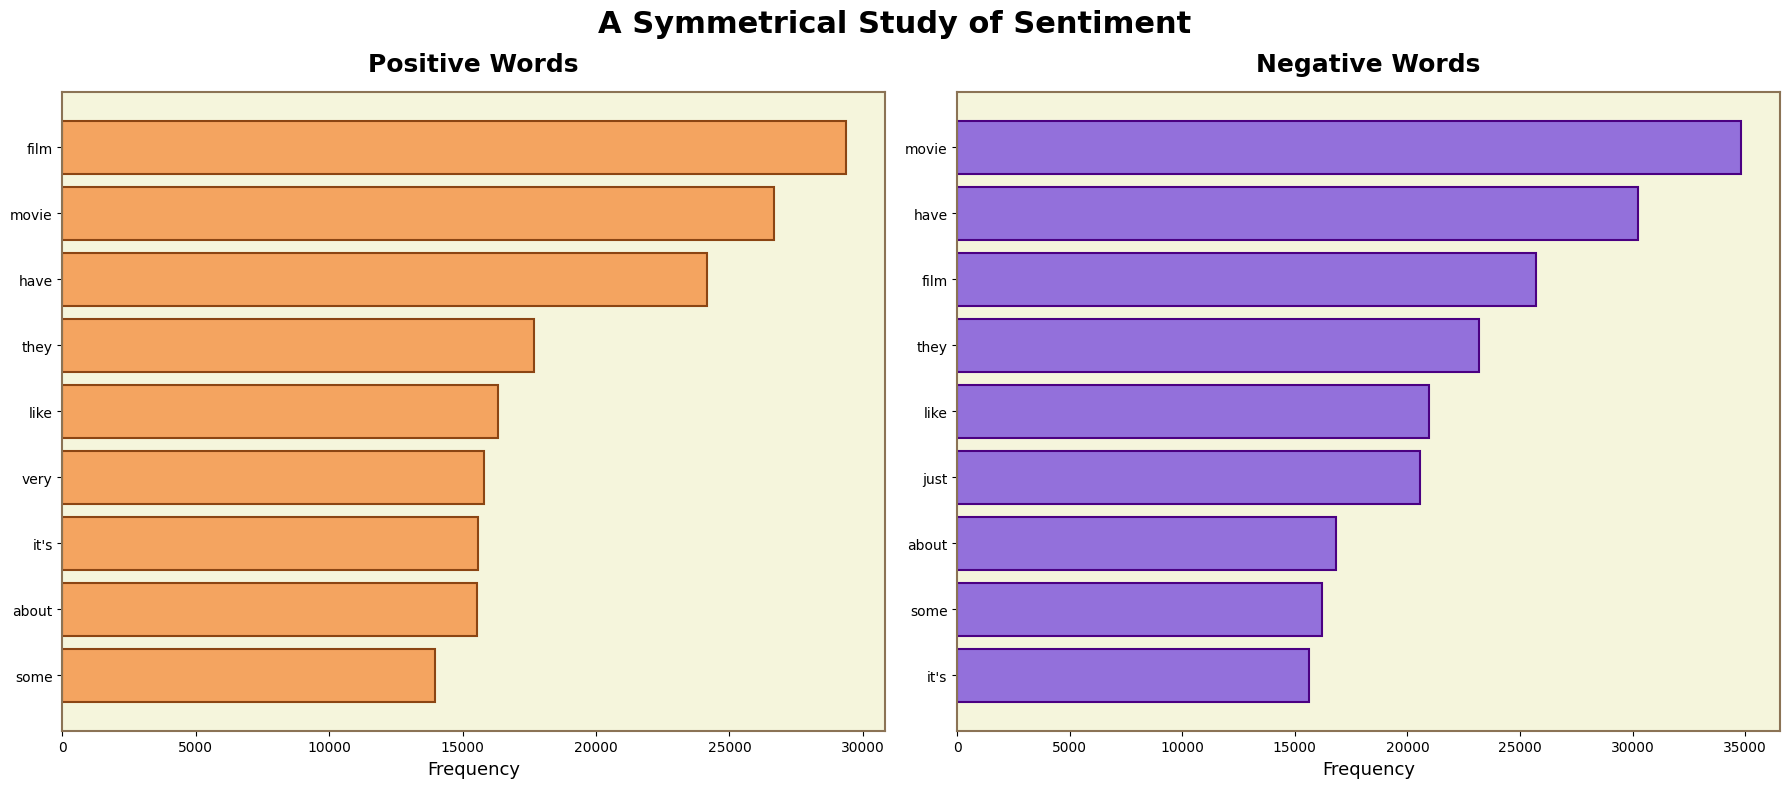

✅ Saved: ../images/03_wes_anderson_words.png (149.3 KB)


In [4]:
print('Creating Visualization 3: Wes Anderson - Word Frequency Comparison...')

wes = WesAnderson()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
wes.style_axes(ax1)
wes.style_axes(ax2)

# Positive words (left panel) - skip /><br HTML artifact
pos_words = [w for w in findings['top_positive_words'] if w[0] != '/><br'][:10]
pos_labels = [w[0] for w in pos_words]
pos_values = [w[1] for w in pos_words]

ax1.barh(pos_labels, pos_values, color='#F4A460', 
         edgecolor='#8B4513', linewidth=1.5)
ax1.set_title("Positive Words", fontsize=18, pad=15, fontweight='600')
ax1.set_xlabel('Frequency', fontsize=13)
ax1.invert_yaxis()

# Negative words (right panel) - skip /><br HTML artifact
neg_words = [w for w in findings['top_negative_words'] if w[0] != '/><br'][:10]
neg_labels = [w[0] for w in neg_words]
neg_values = [w[1] for w in neg_words]

ax2.barh(neg_labels, neg_values, color='#9370DB', 
         edgecolor='#4B0082', linewidth=1.5)
ax2.set_title("Negative Words", fontsize=18, pad=15, fontweight='600')
ax2.set_xlabel('Frequency', fontsize=13)
ax2.invert_yaxis()

# Main title
fig.suptitle('A Symmetrical Study of Sentiment', 
             fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout()
output_path = '../images/03_wes_anderson_words.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

# Verify file exists
if os.path.exists(output_path):
    size_kb = os.path.getsize(output_path) / 1024
    print(f'✅ Saved: {output_path} ({size_kb:.1f} KB)')
else:
    print(f'❌ ERROR: Failed to save {output_path}')

## Visualization 4: Blade Runner - Word Count Scatter

Neon-lit cyberpunk scatter plot showing word count patterns across sentiments.

Creating Visualization 4: Blade Runner - Word Count Scatter...


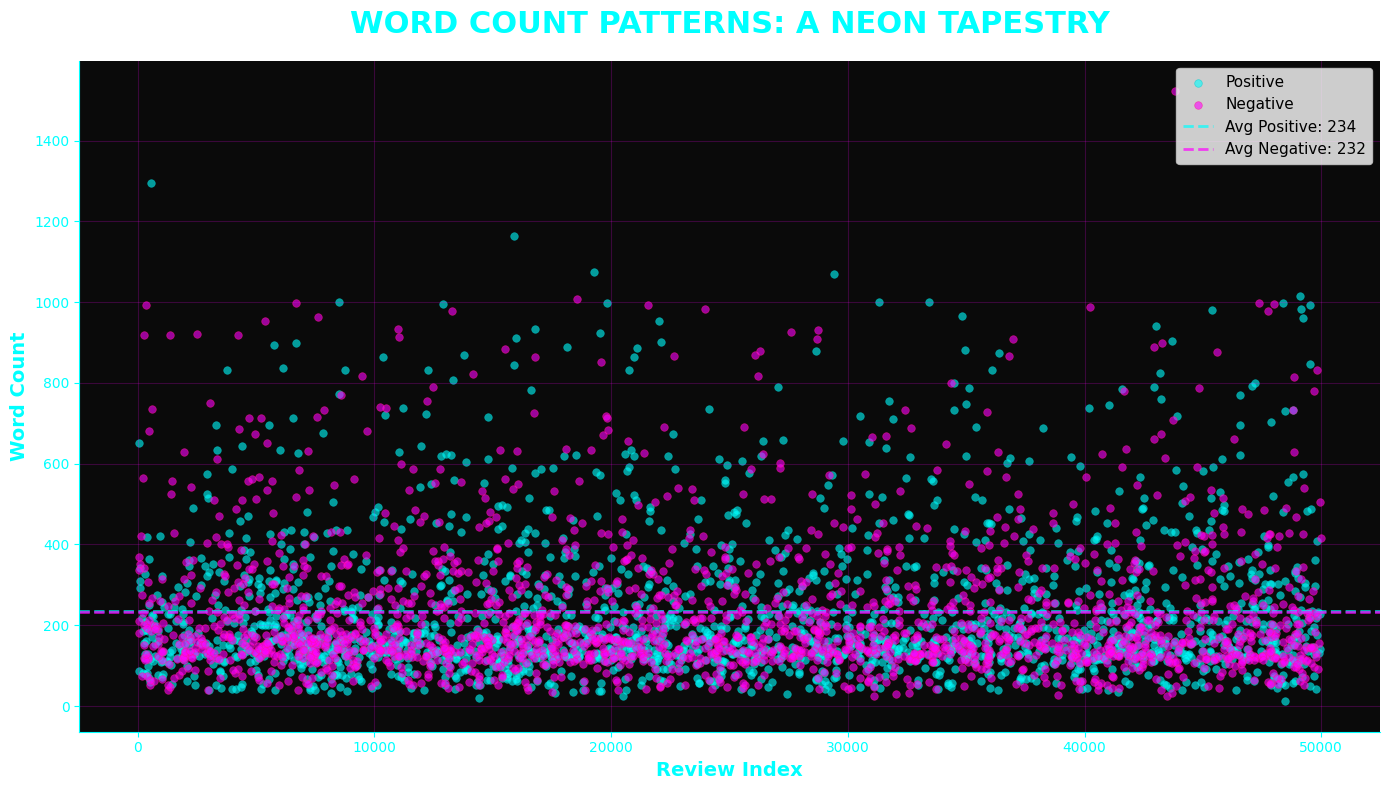

✅ Saved: ../images/04_blade_runner_scatter.png (1620.0 KB)


In [5]:
print('Creating Visualization 4: Blade Runner - Word Count Scatter...')

blade = BladeRunner()
fig, ax = plt.subplots(figsize=(14, 8))
blade.style_axes(ax)

# Scatter plot - sample for performance
sample_size = 2000
positive = df[df['sentiment']=='positive'].sample(n=sample_size, random_state=42)
negative = df[df['sentiment']=='negative'].sample(n=sample_size, random_state=42)

ax.scatter(positive.index, positive['word_count'],
           c='#00FFFF', alpha=0.6, s=30, label='Positive', 
           edgecolors='#00CED1', linewidth=0.5)
ax.scatter(negative.index, negative['word_count'],
           c='#FF00FF', alpha=0.6, s=30, label='Negative',
           edgecolors='#FF1493', linewidth=0.5)

ax.set_title("WORD COUNT PATTERNS: A NEON TAPESTRY", 
             color='cyan', fontsize=22, fontweight='bold', pad=20)
ax.set_xlabel('Review Index', color='#00FFFF', fontsize=14, fontweight='bold')
ax.set_ylabel('Word Count', color='#00FFFF', fontsize=14, fontweight='bold')

# Add average lines
avg_pos = positive['word_count'].mean()
avg_neg = negative['word_count'].mean()
ax.axhline(avg_pos, color='#00FFFF', linestyle='--', 
           linewidth=2, alpha=0.7, label=f'Avg Positive: {avg_pos:.0f}')
ax.axhline(avg_neg, color='#FF00FF', linestyle='--', 
           linewidth=2, alpha=0.7, label=f'Avg Negative: {avg_neg:.0f}')

ax.legend(fontsize=11, loc='upper right', framealpha=0.8)

plt.tight_layout()
output_path = '../images/04_blade_runner_scatter.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='#0a0a0a')
plt.show()

# Verify file exists
if os.path.exists(output_path):
    size_kb = os.path.getsize(output_path) / 1024
    print(f'✅ Saved: {output_path} ({size_kb:.1f} KB)')
else:
    print(f'❌ ERROR: Failed to save {output_path}')

## Visualization 5: Star Wars - Epic Keyword Universe

Bold, dramatic visualization of the top keywords across all reviews in the galaxy.

Creating Visualization 5: Star Wars - Epic Keyword Universe...


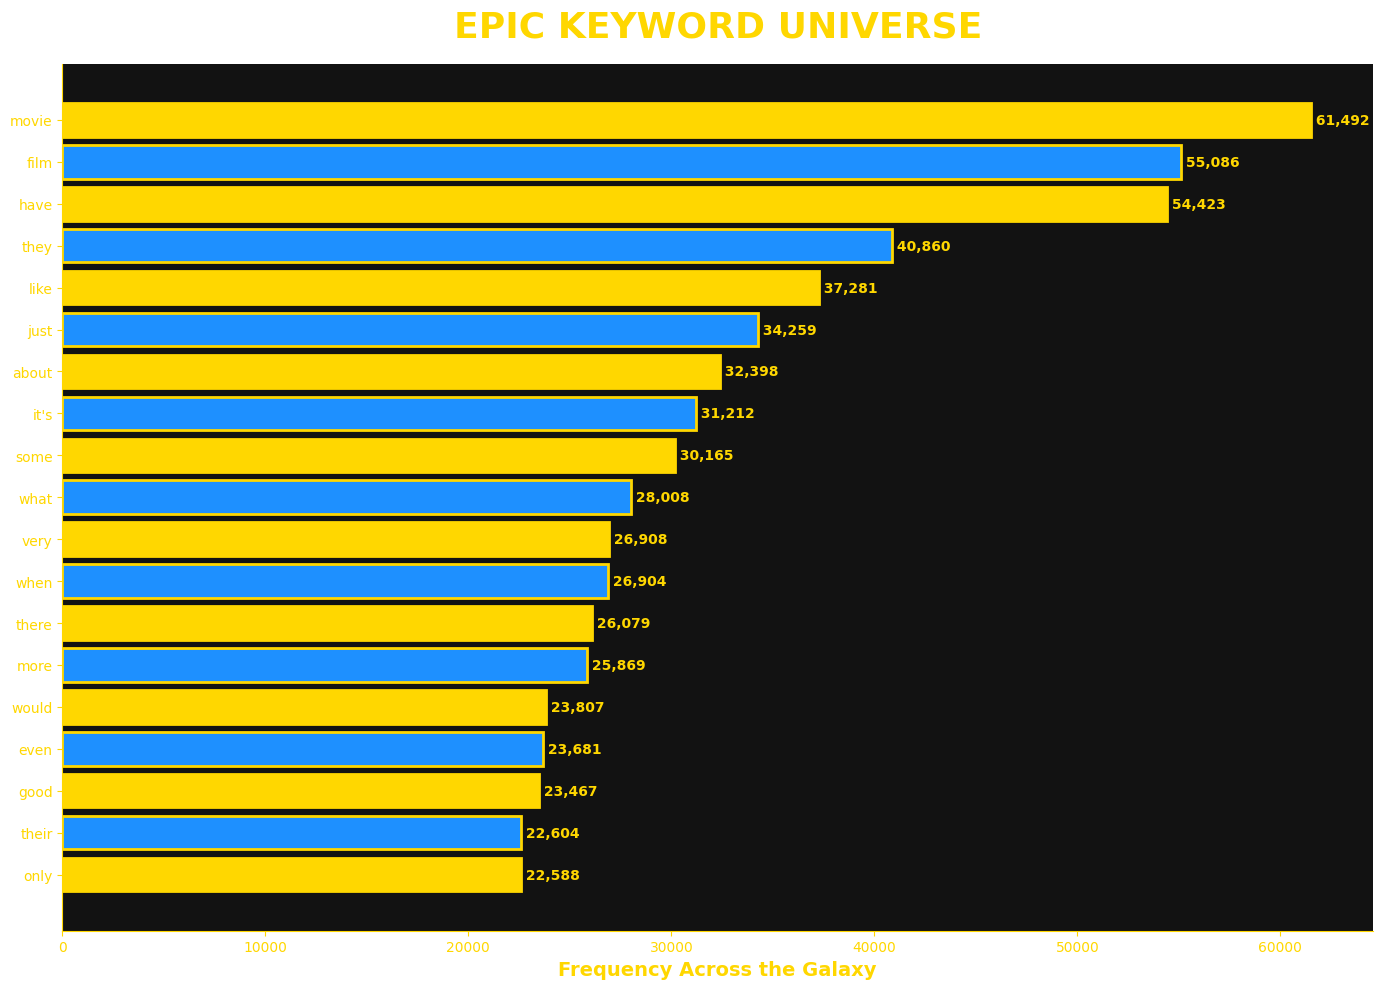

✅ Saved: ../images/05_star_wars_keywords.png (218.1 KB)


In [6]:
print('Creating Visualization 5: Star Wars - Epic Keyword Universe...')

starwars = StarWars()
fig, ax = plt.subplots(figsize=(14, 10))
starwars.style_axes(ax)

# Top 20 words (excluding HTML artifacts)
all_words = [w for w in findings['all_top_words'] if w[0] != '/><br'][:20]
labels = [w[0] for w in all_words]
values = [w[1] for w in all_words]

# Create alternating colors
colors = ['#FFD700' if i % 2 == 0 else '#1E90FF' for i in range(len(labels))]

bars = ax.barh(labels, values, color=colors, 
               edgecolor='gold', linewidth=2)

ax.set_title("EPIC KEYWORD UNIVERSE", 
             color='gold', fontsize=26, fontweight='bold', pad=20)
ax.set_xlabel('Frequency Across the Galaxy', 
              color='gold', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, values)):
    ax.text(value, bar.get_y() + bar.get_height()/2,
            f' {value:,}',
            va='center', ha='left', 
            color='gold', fontsize=10, fontweight='bold')

plt.tight_layout()
output_path = '../images/05_star_wars_keywords.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='black')
plt.show()

# Verify file exists
if os.path.exists(output_path):
    size_kb = os.path.getsize(output_path) / 1024
    print(f'✅ Saved: {output_path} ({size_kb:.1f} KB)')
else:
    print(f'❌ ERROR: Failed to save {output_path}')

## Summary Report

In [7]:
print('\n' + '='*60)
print('VISUALIZATION GENERATION COMPLETE')
print('='*60)

image_files = [
    '01_noir_sentiment.png',
    '02_ghibli_length.png',
    '03_wes_anderson_words.png',
    '04_blade_runner_scatter.png',
    '05_star_wars_keywords.png'
]

print('\nGenerated Images:')
for img in image_files:
    path = f'../images/{img}'
    if os.path.exists(path):
        size_kb = os.path.getsize(path) / 1024
        print(f'  ✅ {img}: {size_kb:.1f} KB')
    else:
        print(f'  ❌ {img}: NOT FOUND')

print('\nAll visualizations saved to: ../images/')
print('='*60)


VISUALIZATION GENERATION COMPLETE

Generated Images:
  ✅ 01_noir_sentiment.png: 106.0 KB
  ✅ 02_ghibli_length.png: 143.1 KB
  ✅ 03_wes_anderson_words.png: 149.3 KB
  ✅ 04_blade_runner_scatter.png: 1620.0 KB
  ✅ 05_star_wars_keywords.png: 218.1 KB

All visualizations saved to: ../images/
